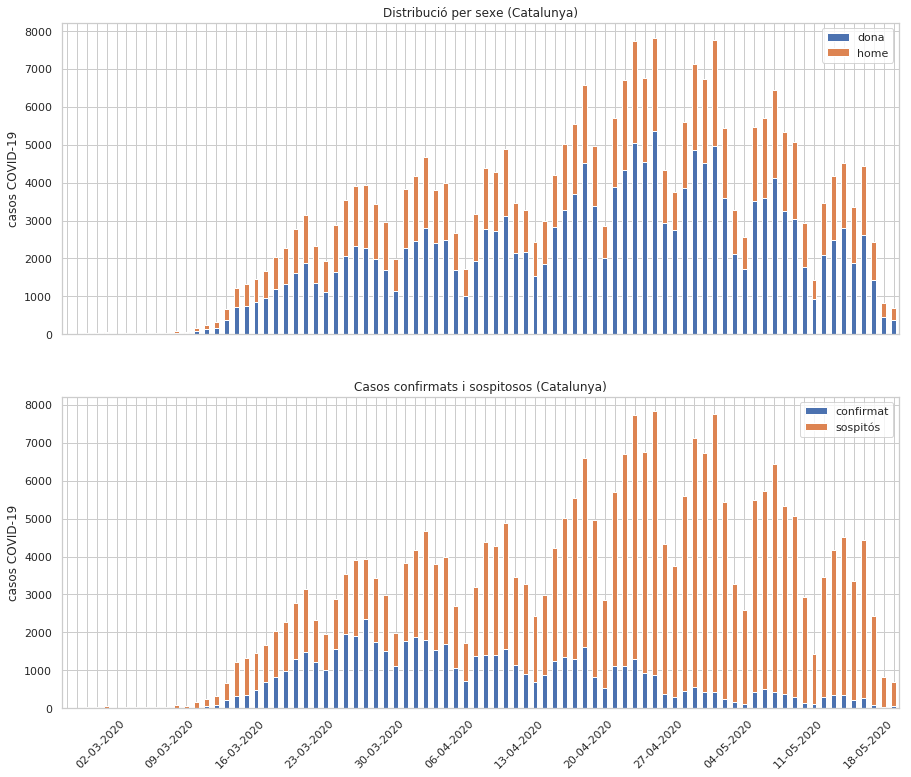

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

# Requiere pip install sodapy
from sodapy import Socrata

sns.set()
sns.set(style='whitegrid')

plt.clf()
plt.cla()
plt.close()

# Asigne el nombre oficial del municipio (en catalán y con los acentos pertinentes) al campo población.
# Para obrener los datos generales de Catalunya, asigne una cadena vacía.
#poblacion = "Molins de Rei"
#poblacion = "Sant Vicenç dels Horts"
poblacion = ""

condicion_poblacion = f"municipidescripcio = '{ poblacion }'" if poblacion else ""
titulo_poblacion = f"{ poblacion }" if poblacion else "Catalunya"

client = Socrata("analisi.transparenciacatalunya.cat", None)
results = client.get(
    "jj6z-iyrp",
     select="data, sexedescripcio, resultatcoviddescripcio, sum(numcasos) as numcasos",
     group="data, sexedescripcio, resultatcoviddescripcio",
     where=f"{ condicion_poblacion }"
)

df = pd.DataFrame.from_records(results)
df['dona'] = df[(df['sexedescripcio'] == 'Dona')]['numcasos'].astype('int64')
df['home'] = df[(df['sexedescripcio'] == 'Home')]['numcasos'].astype('int64')
df['sospitós'] = df[(df['resultatcoviddescripcio'] == 'Sospitós')]['numcasos'].astype('int64')
df['confirmat'] = df[(df['resultatcoviddescripcio'] == 'Positiu PCR')|(df['resultatcoviddescripcio'] == 'Positiu per Test Ràpid')]['numcasos'].astype('int64')
df.reset_index() 
df.index = pd.to_datetime(df['data'].str[:10], format='%Y-%m-%d')

nrow = 2
ncol = 1

figura, ejes = plt.subplots(nrow, ncol, figsize=(15,7 * nrow))

def format_date(value, pos=None):
    fecha = df_plot.iloc[value:value+1].index.date
    dia = pd.Timestamp(fecha[0]).dayofweek
    if (dia == 0):
        return fecha[0].strftime("%d-%m-%Y")
    else:
        return ''

fila = 0

df_plot = pd.DataFrame()
df_plot['dona'] = df['dona'].groupby(['data']).sum()
df_plot['home'] = df['home'].groupby(['data']).sum()
ejes[fila] = df_plot.plot(kind='bar', ax=ejes[fila], stacked=True, title=f"Distribució per sexe ({ titulo_poblacion })")
ejes[fila].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ejes[fila].set_xlabel('')
ejes[fila].set_ylabel('casos COVID-19')

fila = 1

df_plot = pd.DataFrame()
df_plot['confirmat'] = df['confirmat'].groupby(['data']).sum()
df_plot['sospitós'] = df['sospitós'].groupby(['data']).sum()
ejes[fila] = df_plot.plot(kind='bar', ax=ejes[fila], stacked=True, title=f"Casos confirmats i sospitosos ({ titulo_poblacion })")
ejes[fila].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ejes[fila].set_xlabel('')
ejes[fila].set_ylabel('casos COVID-19')

figura.autofmt_xdate(rotation=45)
plt.show()

,data,numcasos,resultatcoviddescripcio,sexedescripcio,dona,home,sospitós,confirmat
data,,,,,,,,
2020-03-16,2020-03-16T00:00:00.000,406,Sospitós,Home,NaN,406.0,406.0,NaN
2020-03-09,2020-03-09T00:00:00.000,67,Sospitós,Dona,67.0,NaN,67.0,NaN
2020-05-03,2020-05-03T00:00:00.000,4,Positiu per Test Ràpid,Home,NaN,4.0,NaN,NaN
2020-04-27,2020-04-27T00:00:00.000,244,Positiu PCR,Dona,244.0,NaN,NaN,NaN
2020-04-07,2020-04-07T00:00:00.000,11,Positiu per Test Ràpid,Home,NaN,11.0,NaN,NaN
2020-03-19,2020-03-19T00:00:00.000,921,Sospitós,Dona,921.0,NaN,921.0,NaN
2020-04-01,2020-04-01T00:00:00.000,1032,Positiu PCR,Dona,1032.0,NaN,NaN,NaN
2020-04-15,2020-04-15T00:00:00.000,2348,Sospitós,Dona,2348.0,NaN,2348.0,NaN
2020-03-18,2020-03-18T00:00:00.000,470,Sospitós,Home,NaN,470.0,470.0,NaN
